<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c1/sprint/Sprint1_Bruno_AnglesRobles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos del alumno

**Nombre**: Bruno


**Apellidos**: Anglés Robles


**Grupo:** B2

# Introducción.

En este ejemplo vamos a trabajar con un conjunto de datos formado por un total de 14999 observaciones y 10 variables, consistente en estudiar diversas características de los empleados de una empresa en relación con su decisión de abandonar o no la empresa. Las variables en estudio, se van a describir posteriormente. 


# Estudio descriptivo de los datos.

En este apartado vamos a familiarizarnos con la estructura que toman estos datos, así como con las diversas características de los mismos y posibles relaciones entre ellos.

Lo primero que hacemos es importar las librerías que vamos a necesitar y los datos en cuestión.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from IPython.display import display
%matplotlib inline

In [2]:
#Descarga manual: https://drive.google.com/file/d/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK/view?usp=sharing
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'

--2023-02-08 22:06:13--  https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.102, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/itp4crvqe0fe32m561spdlvmblgoosdq/1675893900000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=df2eefff-5c8f-481a-b56e-a1ea5a9cf9a1 [following]
--2023-02-08 22:06:13--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/itp4crvqe0fe32m561spdlvmblgoosdq/1675893900000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=df2eefff-5c8f-481a-b56e-a1ea5a9cf9a1
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 74.125.197.132, 2607:

Si no conseguís descargar el fichero con el anterior comando, también lo tenéis a vuestra disposición en los **Recursos del proyecto** con el nombre `Rotacion_empleados.csv`.

In [3]:
# Leemos el conjunto de datos
datos = pd.read_csv("Rotacion_empleados.csv")

In [4]:
# obtenemos las filas y columnas qu contiene
datos.shape

(14999, 10)

In [5]:
# Veamos los primeros datos
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#obtenemos información sobre las variables que contiene este data set 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Significado y contenido de las variables.

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1..

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no. (0: No, 1: Sí)

Observemos que la variable con denominación "sales" no expresa adecuadamente el contenido de la variable, quizá sea más procedente denominarla `department`, que es lo que hacemos a continuación.

In [7]:
datos.rename(columns={'sales': 'department'}, inplace=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Sprint 1

## Análisis descriptivo de los datos

Antes de iniciar la construcción de cualquier modelo de Machine Learning, es primordial realizar un análisis exploratorio que nos permita familiarizarnos con los datos y extraer las primeras conclusiones de los mismos. 


### Ejemplo

Evaluamos el porcentaje de empleados que pertenencen a cada uno de los departamentos (variable que anteriormente se llamaba `sales`y ahora se llama `department`).

In [8]:
datos.department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

Los datos anteriores en formato de gráfico, los obtendremos de la siguiente manera:

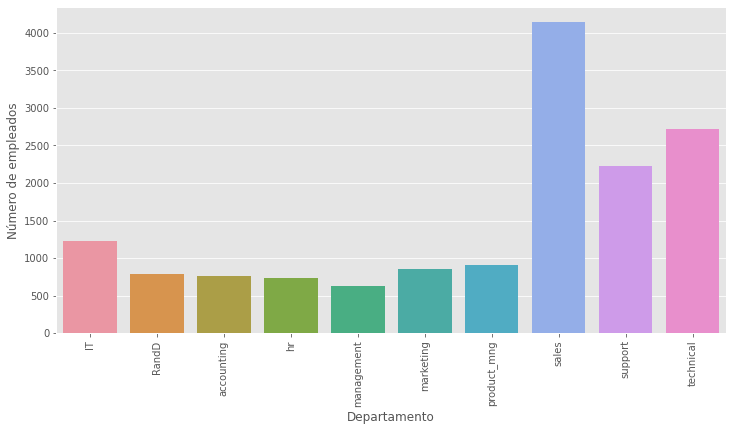

In [9]:
plt.figure(figsize=(12,6))
data_group = datos.groupby(by=['department'],as_index=False).count()
ax = sns.barplot(x="department", y="left", data=data_group)
ax.set(xlabel='Departamento', ylabel='Número de empleados')

plt.xticks(rotation = 90);

Podemos ver que casi un 30% de los empleados presentes en la muestra pertenecen al departamento de ventas.

**¡Ahora es tu turno! ¿Qué más gráficos se te ocurren que pueden aportar una información valiosa al análisis?** 

Os facilito un par de enlaces que os pueden servir de inspiración para realizar esta parte:




*   [Introducción a la estadística descriptiva](https://deepnote.com/@anthonymanotoa/Apuntes-de-Estadistica-Descriptiva-cfa882b6-c07f-43fe-9901-1c2e471ce120): Para aquellos que de seen introducirse a la analítica descriptiva desde cero.
*   [Análisis de datos categóricos con Python](https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/): Enfocado en el estudio de variables categóricas.
*   [Análisis exploratorio de datos con Python](https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python#AN%C3%81LISIS-EXPLORATORIO-DE-DATOS-CON-PYTHON): Estudia la relación entre variables categóricas y variables continuas.

Sin embargo, éstos no dejan de ser unos de los muchos ejemplos sobre cómo realizar el análisis exploratorio, así que tenéis total libertad para explorar y realizar cualquier análisis adicional que se os ocurra.


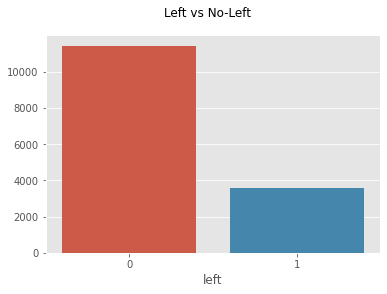

,count,left_percent
left,,
0,11428,76.2%
1,3571,23.8%


In [10]:
# left (variable objetivo)
left_group = datos.groupby("left").count().loc[:,[datos.columns[0]]]
left_group.columns = ["count"]
plt.suptitle("Left vs No-Left")
sns.barplot(x=left_group.index, y=left_group.values.ravel())
plt.show()
total = len(datos)
left_group["left_percent"] = left_group["count"].apply(lambda x: f"{100 * (x / total):.1f}%")
left_group

Vemos que el dataset está desbalanceado, contiene un 76% de casos negativos y un 24% de positivos.

In [11]:
# Esta función nos permite mostrar unos gráficos por defecto para echar un primer vistazo a las variables
def describe_var(name, desc, min=0, max=1, vline=None, hist=True, categorical=False):
  fig = plt.figure(figsize=(12, 5))
  plt.suptitle(desc)
  if not categorical and hist:
    ax1 = sns.histplot(datos, x=name, hue="left", ax=plt.subplot(121))
    ax1.set_xlim(min, max)
    if vline:
      if type(vline) != list:
        vline = [vline]
      for p in vline:
        ax1.axvline(p, ls='--', c="k", label='0.5')
        ax1.text(p, -30, f"({p})")
  else:
    group = datos.groupby(name).count()["left"]
    ax1=sns.barplot(x=group.index, y=group.values, ax=plt.subplot(121) if not categorical else None)
  if not categorical:
    sns.boxplot(x=datos["left"], y=datos[name], ax=plt.subplot(122))
    plt.tight_layout(pad=5)
  plt.show()
  if not categorical:
    print("Correlación con la variable objetivo:", datos.corr()[["left"]].loc[name].values[0])
    display(datos.describe()[[name]].T)

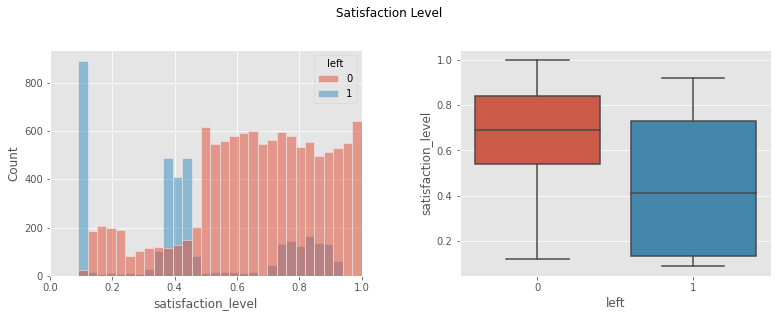

Correlación con la variable objetivo: -0.3883749834241161


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0


In [12]:
# satisfaction_level
describe_var(name="satisfaction_level", desc="Satisfaction Level")

Esta variable contiene valores contínuos entre `[0, 1]`. 

Se distribuye de forma uniforme en dos tramos

- de 0 a 0.44 en dónde están el 25% de los datos
- de 0.45 hasta 1 en dónde están el 75% de los datos.

Tiene una correlación lineal inversa con la variable objetivo y parece claro que cuanto mayor es el nivel de satisfacción menor es la probabilidad de que el empleado deje la empresa.

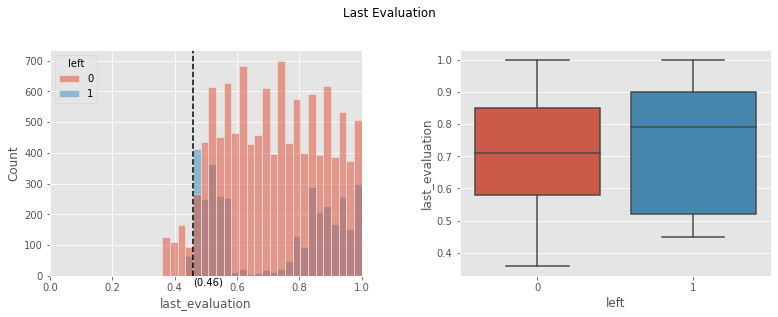

Correlación con la variable objetivo: 0.006567120447529851


,count,mean,std,min,25%,50%,75%,max
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0


El 4.4 % de los valores es <= a 0.46


In [13]:
describe_var("last_evaluation", "Last Evaluation", vline=0.46)
print(f"El {stats.percentileofscore(datos['last_evaluation'],0.46):.1f} % de los valores es <= a 0.46")

Esta vaiable toma valores contínuos en el rango `[0, 1]`. Los valores se distribuyen uniformemente en tres tramos

- de 0 a 0.35 no hay datos
- de 0.36 a 0.46 está el 4% de los datos
- a partir del 0.46 está el 96% de los datos

Esta variable no presenta una correlación lineal con la variable objetivo, pero eso no quiere decir que no sea relevante.

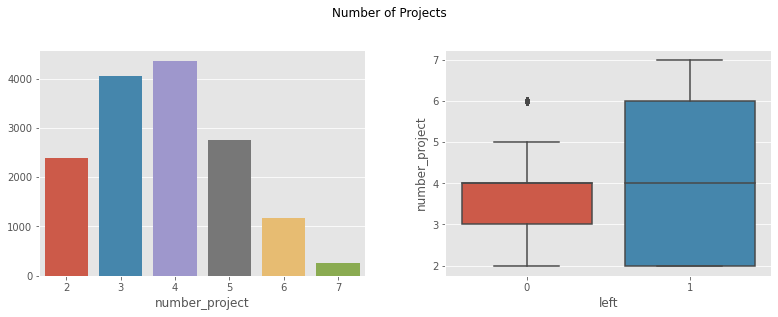

Correlación con la variable objetivo: 0.023787185071774745


,count,mean,std,min,25%,50%,75%,max
number_project,14999.0,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0


La moda de esta variable es:  4


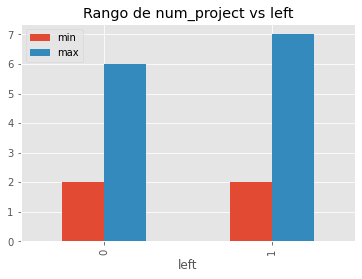

Total de casos con 7 proyectos: 256 (1.7%)


In [14]:
# number_project
describe_var("number_project", "Number of Projects", min=1, max=7, hist=False)
print("La moda de esta variable es: ", int(datos.number_project.mode()))

datos.groupby("left").agg(["min", "max"])["number_project"].plot(kind="bar", title="Rango de num_project vs left")
plt.show()
np_eq_7 = datos.loc[datos.number_project == 7, "left"].agg("count")
np_eq_7_rt = (np_eq_7 / len(datos)) * 100
print(f"Total de casos con 7 proyectos: {np_eq_7} ({np_eq_7_rt:.1f}%)")

Esta es una variable discreta que toma valores entre `[2, 7]` en este dataset.

Lo más común es que un empleado haya partic ipado en 4 proyectos o menos, siendo el valor más común 4 (la moda).

Esta variable no parece correlacionada con la variable objetivo. El único patrón que he detectado es que todos aquellos que han participado en 7 proyectos han renunciado. Pero esto representa menos del 2% de los datos.

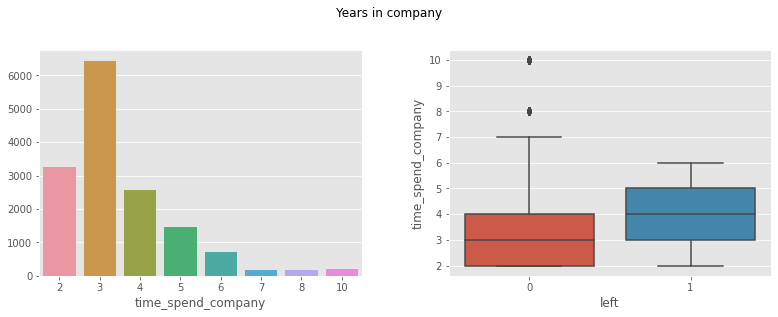

Correlación con la variable objetivo: 0.14482217493938626


,count,mean,std,min,25%,50%,75%,max
time_spend_company,14999.0,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0


In [15]:
# time_spend_company
describe_var("time_spend_company", "Years in company", min=1, max=10, hist=False)

Esta variable tiene una ligera correlación lineal con la variable objetivo.

Parece que hay una relación entre años en la empresa y la probabilidad de renunciar. Cuanta mayor es la antiguedad más probabilidad de que el empleado abandone.

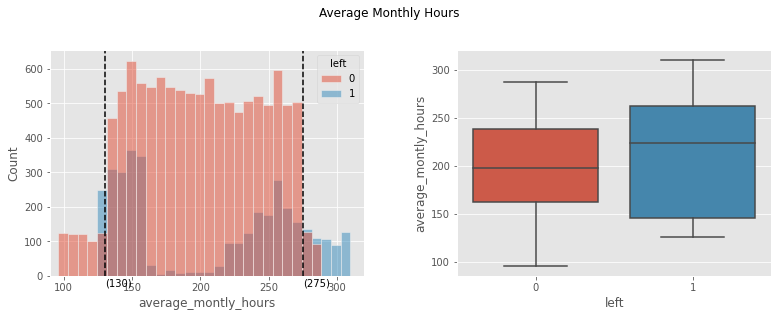

Correlación con la variable objetivo: 0.07128717878330088


,count,mean,std,min,25%,50%,75%,max
average_montly_hours,14999.0,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0


In [16]:
# average_montly_hours
describe_var("average_montly_hours", "Average Monthly Hours", min=90, max=320, vline=[130, 275])

Esta variable toma la mayor parte de los valores en el rango `[130, 275]` y sigue una distribución uniforme en este rango

La variable no tiene una correlación lineal con la variable objetivo, pero eso no quiere decir que no sea relevante

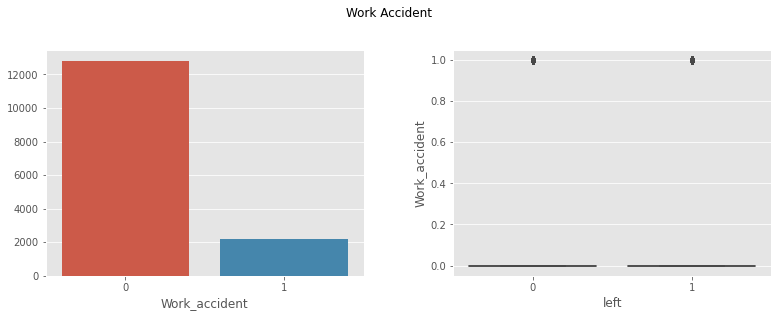

Correlación con la variable objetivo: -0.15462163370513443


,count,mean,std,min,25%,50%,75%,max
Work_accident,14999.0,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0



Total de casos accidente de trabajo: 2169 (14.5%)



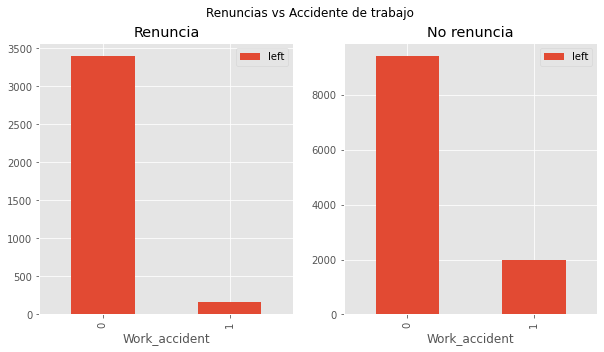

In [17]:
# Work_accident
describe_var("Work_accident", "Work Accident", hist=False)

wa = datos.loc[datos.Work_accident == 1, "left"].agg("count")
wa_rt = (wa / len(datos)) * 100
print(f"\nTotal de casos accidente de trabajo: {wa} ({wa_rt:.1f}%)\n")

fig = plt.figure(figsize=(10, 5))
plt.suptitle("Renuncias vs Accidente de trabajo")
datos.loc[datos.left == 1, ["Work_accident", "left"]].groupby("Work_accident").count().plot(kind="bar", title="Renuncia", ax=plt.subplot(121))
datos.loc[datos.left == 0, ["Work_accident", "left"]].groupby("Work_accident").count().plot(kind="bar", title="No renuncia", ax=plt.subplot(122))
plt.show()

Esta es una variable binaria que toma un valor positivo en un 14.5% de los casos. Tiene una correlación lineal inversa con la variable objetivo.

Aunque el efecto parece pequeño parece interesante tenerla en cuenta.

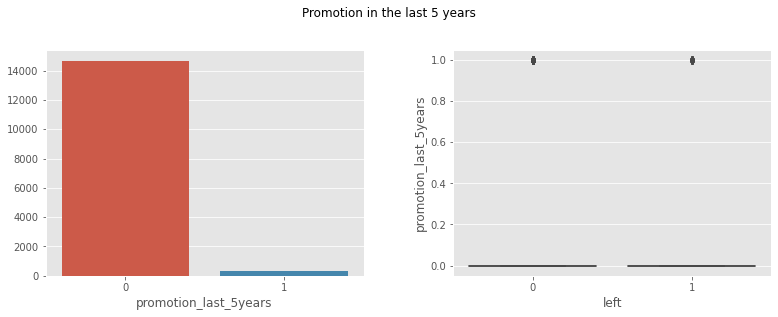

Correlación con la variable objetivo: -0.06178810657920049


,count,mean,std,min,25%,50%,75%,max
promotion_last_5years,14999.0,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0



Total de casos que han promocionado: 319 (2.1%)



In [18]:
# promotion_last_5years
describe_var("promotion_last_5years", "Promotion in the last 5 years", hist=False)

pmt = datos.loc[datos.promotion_last_5years == 1, "left"].agg("count")
pmt_rt = (pmt / len(datos)) * 100
print(f"\nTotal de casos que han promocionado: {pmt} ({pmt_rt:.1f}%)\n")

Esta es una variable binaria, los casos positivos representan apenas un 2% y no presenta una correlación lineal con la variable objetivo.

Esta variable puede añadir ruido a los datos con lo que igual conviene eliminarla.

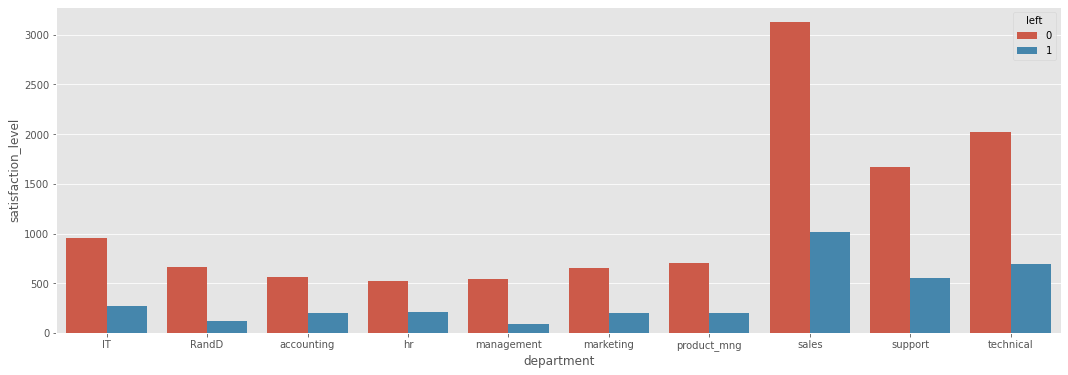

left,0,1,All,percent_left
department,,,,
IT,954,273,1227,22.2%
RandD,666,121,787,15.4%
accounting,563,204,767,26.6%
hr,524,215,739,29.1%
management,539,91,630,14.4%
marketing,655,203,858,23.7%
product_mng,704,198,902,22.0%
sales,3126,1014,4140,24.5%
support,1674,555,2229,24.9%


In [19]:
# department (originalmente: sales)
plt.figure(figsize=(18,6))
dpt_group = datos.groupby(["department", "left"]).count().reset_index()
sns.barplot(data=dpt_group, x="department", y=datos.columns[0], hue="left")
plt.show()

# Tabla de contingencia
dpt_ct = pd.crosstab(index=datos['left'],
            columns=datos['department'], margins=True).T
dpt_ct["percent_left"] = dpt_ct.apply(lambda x: f"{100 * (x[1] / x['All']):.1f}%", axis=1)
dpt_ct

Esta es una variable categórica que puede ser relevante. 

Vemos que el porcentaje de renuncias varia muy poco entre departamentos. No obstante puede que esta variable, en combinación con otras, ayude a la predicción.

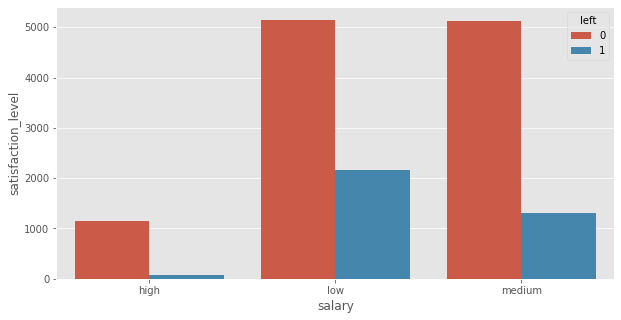

left,0,1,All,percent_left
salary,,,,
high,1155,82,1237,6.6%
low,5144,2172,7316,29.7%
medium,5129,1317,6446,20.4%
All,11428,3571,14999,23.8%


In [20]:
# salary
plt.figure(figsize=(10,5))
sal_group = datos.groupby(["salary", "left"]).count().reset_index()
sns.barplot(data=sal_group, x="salary", y=datos.columns[0], hue="left")
plt.show()

# Tabla de contingencia
sal_ct = pd.crosstab(index=datos['left'],
            columns=datos['salary'], margins=True).T
sal_ct["percent_left"] = sal_ct.apply(lambda x: f"{100 * (x[1] / x['All']):.1f}%", axis=1)
sal_ct

En esta variable categórica vemos un patrón claro, el porcentaje de renuncia decrece a medida que aumenta el nivel salarial, siendo especialmente bajo en los salarios más altos.

Esta parece una buena vaiable predictora.

## Análisis predictivo

### Preparación de los datos

¿Existe alguna variable categórica que queramos utilizar en nuestro modelo? Puedes volver a revisar el vídeo de la Clase 1 Tema 4 - **Laboratorio Preprocesamiento de datos: parte 2**, donde a partir del minuto 5:55 se explica en detalle cómo proceder en estos casos.

In [21]:
# Tenemos dos variables categóricas department y salary

# Voy a codificarlas ambas mediante la técnica OneHotEncoding
# - department: esto es necesario ya que estas categorías tienen ningún orden
# - salary: aunque las categorías tienen ordenada, no sé si todas ellas son 
#          equidistantes.

# Para ello voy a usar la implementación de pandas que me permite
#    crear dummies para estas categorias
datos = (
    pd.get_dummies(
        datos, 
        columns=["salary", "department"],
        drop_first=True # voy a crear n-1 categorias para evitar redundancia
        )
    )

datos.columns



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_low', 'salary_medium',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

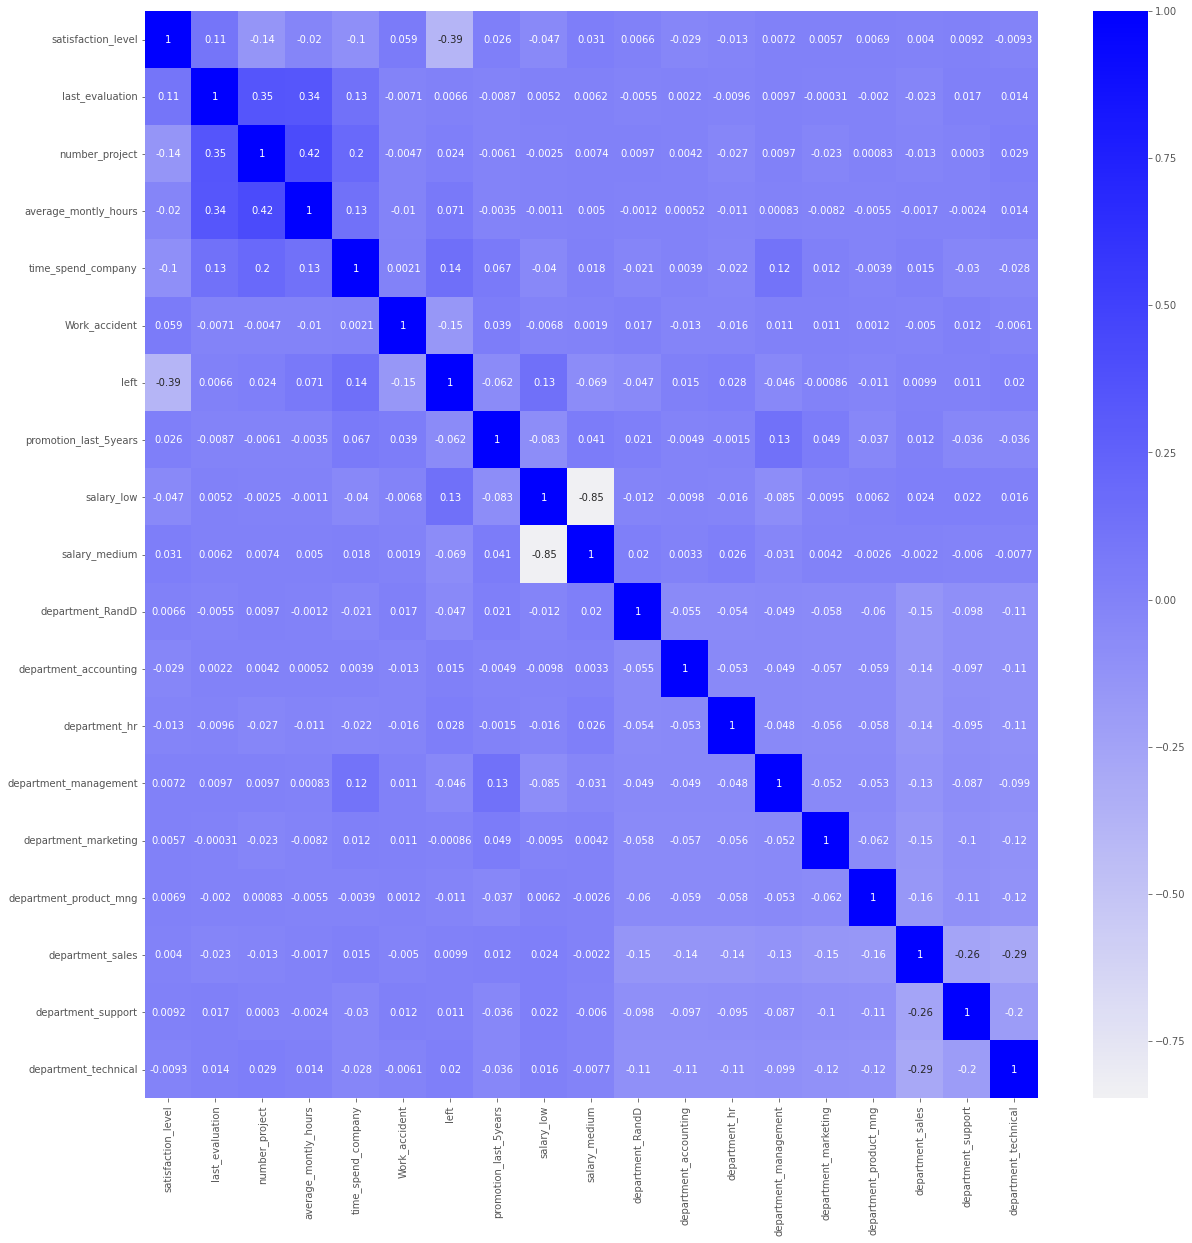

In [22]:
# ANÁLISIS DE CORRELACIONES

plt.figure(figsize=(20,20))
corr = datos.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

Hay dos variables que están fuertemente correlacionadas entre sí `salary_low` y `salary_medium`. 

Se trata de los dummies al codifigar la variable categórica `salary`. 

Es probable que esta corelación afecte a los modelos.

### Implementación de los modelos

Es importante tener en cuenta que estamos ante un problema de clasifiación binaria (0: No abandona, 1: Sí abandona). Por lo tanto, de entre los 4 diferentes algoritmos que hemos visto esta semana **sólo podemos aplicar 2**
, ¿cuáles son?

En los vídeos de los laboratorios podéis encontrar una carpeta con los **recursos** de apoyo que contiene un ejemplo paso a paso sobre cómo implementar estos modelos en Python. Os animo a entenderlos bien y tratar de seguir el mismo procedimiento para estos datos.

**IMPORTANTE**: Recordad que antes de entrenar un modelo es clave particionar los datos en, al menos, dos conjuntos diferentes: uno para entrenar el modelo (train) y otro para evaluar su capacidad predictiva (test).

In [23]:
from sklearn.model_selection import train_test_split 

X = datos.loc[:, datos.columns != "left"]
print("X:", X.shape)
y = datos.loc[:, "left"]
print("y:", y.shape)

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.3,
                                                   shuffle= True, 
                                                   random_state= 42)

X: (14999, 18)
y: (14999,)


In [24]:
# Algunas variables necssitan de normalización o estandarización
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# number_project+time_spend_company . Valores discretos, los normalizo para que estén entre 0 y 1
print(f"number_project (before):\tmin={X_train.number_project.min():.0f}\tmax={X_train.number_project.max():.0f}")
print(f"time_spend_company (before):\tmin={X_train.time_spend_company.min():.0f}\tmax={X_train.time_spend_company.max():.0f}")

mm_scaler = MinMaxScaler()
X_train[["number_project", "time_spend_company"]] = mm_scaler.fit_transform(X_train[["number_project", "time_spend_company"]])
X_test[["number_project", "time_spend_company"]] = mm_scaler.transform(X_test[["number_project", "time_spend_company"]])

print(f"number_project (after):\tmin={X_train.number_project.min():.0f}\tmax={X_train.number_project.max():.0f}")
print(f"time_spend_company (after):\tmin={X_train.time_spend_company.min():.0f}\tmax={X_train.time_spend_company.max():.0f}")
print()

# average_montly_hours. Valores contínuos, los estandarizo par que tengan media 0 y desv. est. 1
print(f"average_montly_hours (before):\tmean={X_train.average_montly_hours.mean():.2f}\tstd={X_train.average_montly_hours.std():.2f}")

std_scaler = StandardScaler()
X_train["average_montly_hours"] = std_scaler.fit_transform(X_train["average_montly_hours"].values.reshape(-1, 1))
X_test["average_montly_hours"] = std_scaler.transform(X_test["average_montly_hours"].values.reshape(-1, 1))

print(f"average_montly_hours (before):\tmean={X_train.average_montly_hours.mean():.2f}\tstd={X_train.average_montly_hours.std():.2f}")

number_project (before):	min=2	max=7
time_spend_company (before):	min=2	max=10
number_project (after):	min=0	max=1
time_spend_company (after):	min=0	max=1

average_montly_hours (before):	mean=200.93	std=49.89
average_montly_hours (before):	mean=-0.00	std=1.00


Como el problema es de clasificación binaria vamos a usar estos dos algoritmos:

- KNN
- Logistic Regression

#### Modelo 1

In [25]:
# Quitamos variabes irrelevantes. KNN es muy sensible a ellas
#
# De las etapas anteriores hemos detectado algunas variables candidatas
#  a eliminars
#  - number_project y promotion_last_5years, en el análisis exploratorio
#     se ha visto que pueden ser irrelevantes o ruído
#  - salary_medium, se ha visto que tiene mucha correlación con salary_low
#     se deja esta última
#
X_train_knn = X_train
X_test_knn = X_test

# ["number_project", "promotion_last_5years"]
# Tras hacer pruebas se ha visto que es mejor mantener estas variables

# En cambio KNN sí mejora al eliminar esta, eso es debido que al estar 
# tan correlacionada con salary_low se volvía irrelevante
drop_vars = ["salary_medium"]

X_train_knn = X_train.drop(drop_vars, axis=1)
print("X_train_knn:", X_train_knn.shape)
X_test_knn = X_test.drop(drop_vars, axis=1)
print("X_test_knn:", X_test_knn.shape)

X_train_knn: (10499, 17)
X_test_knn: (4500, 17)


In [26]:
# Convertimos las variables a arrays de Numpy, necesario para KNN
X_train_knn= np.asarray(X_train_knn)
print("X_train_knn:", X_train_knn.shape)
y_train_knn= np.asarray(y_train)
print("y_train_knn:", y_train_knn.shape)

X_test_knn= np.asarray(X_test_knn)
print("X_test_knn:", X_test_knn.shape)
y_test_knn= np.asarray(y_test)
print("y_test_knn:", y_test_knn.shape)

X_train_knn: (10499, 17)
y_train_knn: (10499,)
X_test_knn: (4500, 17)
y_test_knn: (4500,)


In [27]:
# Entrenamos el modelo
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_knn, y_train_knn)
y_pred_knn= knn.predict(X_test_knn)
print(y_pred_knn.shape)

(4500,)


#### Modelo 2

In [28]:

# Para la regresión lógistica se ha visto que la única variable
#  que al eliminarse modifica el modelo es esta. Esto es así
#  porque los modelos de regresión dan por supuesto que las variables
#  son linealmente independientes.
drop_vars = ["salary_medium"]

X_train = X_train.drop(drop_vars, axis=1)
print("X_train:", X_train.shape)
X_test = X_test.drop(drop_vars, axis=1)
print("X_test:", X_test.shape)

X_train: (10499, 17)
X_test: (4500, 17)


In [29]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [30]:
# Entrenamos el modelo

from sklearn.linear_model import LogisticRegression
# Hiperparámetros obtenidos haciendo pruebas con Random Search
lr = LogisticRegression(C=4, solver='lbfgs', tol=0.14, max_iter=260, random_state=0, fit_intercept=True)
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)
print(y_pred_lr.shape)

(4500,)


In [31]:
#
# CÓDIGO DE PRUEBA PARA ENCONTRAR LOS MEJORES HIPERPARAMETROS 
# Lo dejo comentado para que no tarde tanto


# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform
# from sklearn.utils.fixes import loguniform

# logistic = LogisticRegression(random_state=0)
# # distributions = dict(C=uniform(loc=0, scale=4), penalty=['l1', 'l2', 'none'])
# distributions = dict(
#     C=uniform(loc=0, scale=4), 
#     solver=['newton-cg', 'lbfgs', 'sag', 'saga'],
#     max_iter=uniform(loc=100, scale=200),
#     fit_intercept=[True, False],
#     tol=loguniform(1e-4, 1e0)
# )
# lr = RandomizedSearchCV(logistic, distributions, scoring="accuracy", cv=10, random_state=0)
# search = lr.fit(X_train, y_train)
# y_pred_lr= lr.predict(X_test)
# print(y_pred_lr.shape)
# print("Best params:", search.best_params_)
# print("Best score:", search.best_score_)

El entrenamiento del modelo por sí solo no nos aporta una información relevante, sino que es igual de importante saber interpretar los resultados obtenidos. Es fundamental a investigar otras métricas aparte del accuracy, para saber si el modelo se comporta igual de bien para predecir ambas clases. Unos ejemplos podían ser:

*   Matriz de confusión.
*   Recall, precisio, f1-score, etc. -`classification_report()`.
*   [Curva ROC y AUC](https://mlu-explain.github.io/roc-auc/) - [`RocCurveDisplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay).

.

In [32]:
# Definimos una función que nos permitirá mostrar gráficamente la matriz de confusión
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y representa la matriz de confusión
    Puede aplicarse la normalización de la matriz con el parámetro `normalize=True`.
    """
    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Matriz de confusión normalizada")
    # else:
    #     print('Matriz de confusión sin normalización')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Categoría verdadera')
    plt.xlabel('Categoría predicha')
    plt.tight_layout()

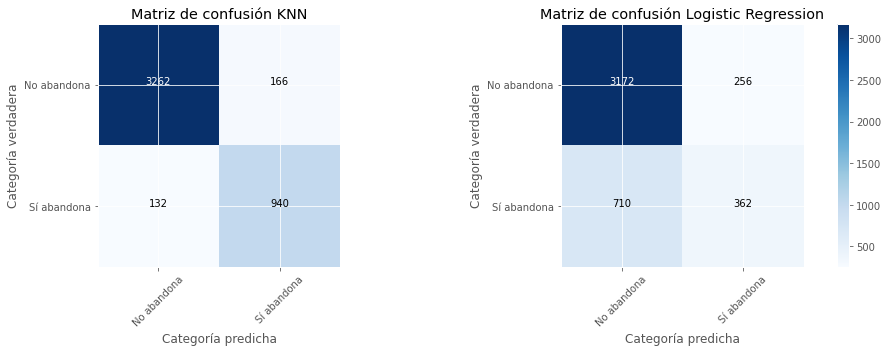

In [33]:
from sklearn.metrics  import confusion_matrix

plt.figure(figsize=(16, 5))

# KNN
cnf_matrix_knn = confusion_matrix(y_test_knn,y_pred_knn)
plt.subplot(121)
plot_confusion_matrix(cnf_matrix_knn, classes=["No abandona", "Sí abandona"],
                      title='Matriz de confusión KNN')

# Logistic Regression
cnf_matrix_lr = confusion_matrix(y_test,y_pred_lr)
plt.subplot(122)
plot_confusion_matrix(cnf_matrix_lr, classes=["No abandona", "Sí abandona"],
                      title='Matriz de confusión Logistic Regression')

In [34]:
total = len(datos)
fallos_knn = 132 + 166
fallos_lr = 710 + 256

print(f"Tasa de errores en KNN {100 * (fallos_knn / total):.1f}%")
print(f"Tasa de errores en Logistic Regression {100 * (fallos_lr / total):.1f}%")

Tasa de errores en KNN 2.0%
Tasa de errores en Logistic Regression 6.4%


La matriz de confusión indica que se han cometido más errores en la regresión logística que en KNNN

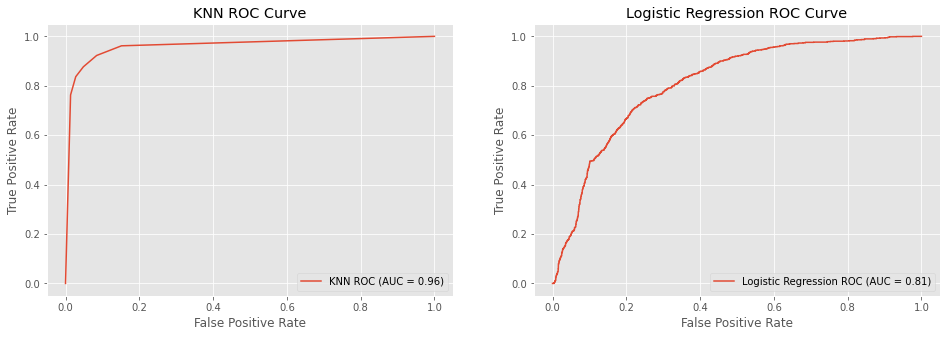

In [35]:
# Curva ROC mediante RocCurveDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fig = plt.figure(figsize=(16 , 5))

# KNN
y_pred_test_knn = knn.predict_proba(X_test_knn)[:,1]

fpr_knn, tpr_knn, _ = roc_curve(y_test_knn, y_pred_test_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
axknn = ax=plt.subplot(121)
axknn.set_title("KNN ROC Curve")
display_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn, estimator_name='KNN')
display_knn.plot(ax=axknn, name="KNN ROC")

# Logistic Regression
y_pred_test_lr = lr.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_test_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
axlr = ax=plt.subplot(122)
axlr.set_title("Logistic Regression ROC Curve")
display_lr = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr, estimator_name='Logistic Regression')
display_lr.plot(ax=axlr, name="Logistic Regression ROC")

# Show
plt.show()

El área bajo la curva (AUC) es mejor para KNN, esto indica un mejor poder de predicción.

No obstante, debemos estar pendientes también del sobreajuse. Para ello voy a mostrar par cada modelo las curvas ROC sobre el conjunto de entrenamiento y sobre el conjunto de test.

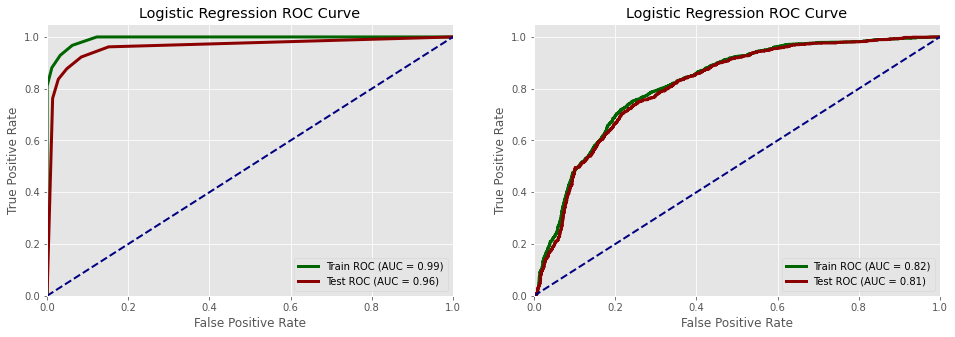

In [36]:
# Curva ROC mediante una función personalizada
#
# Encapsulamos la generación de la curva ROC en una función reutilizable
#
def plot_ROC(y_train, y_test, pred_train, pred_test, title="ROC"):
  # CURVA ROC Y AUC PARA TRAINING
  fpr_train, tpr_train, _ = roc_curve(y_train, pred_train)
  roc_auc_train = auc(fpr_train, tpr_train)

  # CURVA ROC Y AUC PARA TEST
  fpr_test, tpr_test, _ = roc_curve(y_test, pred_test)
  roc_auc_test = auc(fpr_test, tpr_test)

  # GRAFICA
    
  lw = 2

  plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw+1,label="Train ROC (AUC = %0.2f)" % roc_auc_train,)
  plt.plot(fpr_test,tpr_test,color="darkred",lw=lw+1,label="Test ROC (AUC = %0.2f)" % roc_auc_test,)

  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  plt.legend(loc="lower right")

fig = plt.figure(figsize=(16 , 5))


# KNN
axknn = ax=plt.subplot(121)
axknn.set_title("KNN ROC Curve")
y_pred_train_knn = knn.predict_proba(X_train_knn)[:,1]
plot_ROC(
    y_train=y_train_knn,
    y_test=y_test_knn,
    pred_train=y_pred_train_knn,
    pred_test=y_pred_test_knn,
    title="KNN ROC Curve"
)

# KNN
axlr = ax=plt.subplot(122)
axknn.set_title("Logistic Regression ROC Curve")
y_pred_train_lr = lr.predict_proba(X_train)[:,1]
plot_ROC(
    y_train=y_train,
    y_test=y_test,
    pred_train=y_pred_train_lr,
    pred_test=y_pred_test_lr,
    title="Logistic Regression ROC Curve"
)

# Show
plt.show()

Aquí vemos que, si bien KNN parece tener una mejor capacidad predictora, la regresión logística se ha ajustado con menos sobreajuste.

In [37]:
from sklearn.metrics import classification_report

print("Classification report KNN")
print("="*26)
print(classification_report(y_test_knn, y_pred_knn, target_names=["Sin abandono", "Con abandono"]))

print()

print("Classification report Logistic Regression")
print("="*42)
print(classification_report(y_test, y_pred_lr, target_names=["Sin abandono", "Con abandono"]))

Classification report KNN
              precision    recall  f1-score   support

Sin abandono       0.96      0.95      0.96      3428
Con abandono       0.85      0.88      0.86      1072

    accuracy                           0.93      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.93      0.93      0.93      4500


Classification report Logistic Regression
              precision    recall  f1-score   support

Sin abandono       0.82      0.93      0.87      3428
Con abandono       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500



Este informe nos dice lo siguiente.

- Según el `f1-score`, ambos modelos predicen mejor la clase `Sin abandono`.
- Según el `accuracy`, el modelo KNN está mejor ajustado que Logistic Regression.

# Conclusión

Sobre este dataset considero que el mejor algoritmo es KNN

| Métrica | Mejor | Valor KNN | Valor Logistic Regression |
| --- | --- | ---| --- |
| Matriz de confusión | KNN | Tasa de error: 2% | Tasa de error: 6.4% |
| Curva ROC | KNN | AUC = 96 | AUC = 81 |
| accuracy | KNN | 93% | 79% | 